# ✈️ Airline On-Time Performance & Delays Analysis
_A real-world data analytics project using Python, Pandas, SQL, and Tableau_


## 1. Project Objective

In this project, we analyze U.S. domestic airline performance data for Jan–Mar 2025.
We aim to identify the main factors contributing to flight delays and cancellations,
and provide actionable insights to help airlines and airports improve on-time performance.


## 2. Import Libraries

We start by importing all necessary Python libraries.


In [16]:
import pandas as pd
import os


## 3. Set Working Directory

To ensure we read our data correctly, we set the working directory to our project folder.


In [9]:
import os

os.chdir(r'C:\Users\Lenovo\Desktop\ProjectsAirline_Delay_Project')

print(os.getcwd())  # Should now show the correct folder!


C:\Users\Lenovo\Desktop\ProjectsAirline_Delay_Project


## 4. Load Data

Load the raw airline delay data from the `data` folder.


In [11]:
import pandas as pd

df = pd.read_csv('data/Airline_Delay_Cause.csv')

print(df.head())
print(df.info())


   year  month carrier                             carrier_name airport  \
0  2025      3      G7  GoJet Airlines LLC d/b/a United Express     ICT   
1  2025      3      G7  GoJet Airlines LLC d/b/a United Express     ILM   
2  2025      3      G7  GoJet Airlines LLC d/b/a United Express     IND   
3  2025      3      G7  GoJet Airlines LLC d/b/a United Express     ITH   
4  2025      3      G7  GoJet Airlines LLC d/b/a United Express     LEX   

                                        airport_name  arr_flights  arr_del15  \
0  Wichita, KS: Wichita Dwight D Eisenhower National         27.0       11.0   
1           Wilmington, NC: Wilmington International         57.0       16.0   
2       Indianapolis, IN: Indianapolis International          6.0        2.0   
3  Ithaca/Cortland, NY: Ithaca Tompkins Internati...         48.0       16.0   
4                          Lexington, KY: Blue Grass         89.0       18.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_c

## 5. Data Inspection

Check for missing values, unique values, and understand the structure of the data.


In [21]:
# Missing values
df.isnull().sum()

# Example: Unique carriers and airports
print(df['carrier'].unique())
print(df['airport'].unique())


['G7' 'HA' 'MQ' 'NK' 'OH' 'OO' 'PT' 'QX' 'UA' 'WN' 'YV' 'YX' 'ZW' '9E'
 'AA' 'AS' 'B6' 'C5' 'DL' 'F9' 'G4']
['ICT' 'ILM' 'IND' 'ITH' 'LEX' 'LGA' 'LIT' 'LNK' 'MDT' 'MEM' 'MHT' 'MLI'
 'MSN' 'OMA' 'ORD' 'ORF' 'PHL' 'PIT' 'PVD' 'PWM' 'RDU' 'RIC' 'ROA' 'ROC'
 'SAV' 'SCE' 'SDF' 'SGF' 'STL' 'SYR' 'TUL' 'TVC' 'TYS' 'XNA' 'AUS' 'BOS'
 'HNL' 'ITO' 'JFK' 'KOA' 'LAS' 'LAX' 'LGB' 'LIH' 'OAK' 'OGG' 'ONT' 'PDX'
 'PHX' 'PPG' 'SAN' 'SEA' 'SFO' 'SJC' 'SLC' 'SMF' 'ABI' 'ABQ' 'AGS' 'ALB'
 'AMA' 'ATL' 'ATW' 'AVL' 'AVP' 'BDL' 'BFL' 'BHM' 'BIL' 'BIS' 'BMI' 'BNA'
 'BOI' 'BRO' 'BTR' 'BUF' 'BWI' 'CAE' 'CHA' 'CHS' 'CID' 'CLD' 'CLE' 'CLT'
 'CMH' 'CMI' 'COS' 'COU' 'CRP' 'CVG' 'CWA' 'DAY' 'DCA' 'DEN' 'DFW' 'DSM'
 'DTW' 'ECP' 'ELP' 'EUG' 'EVV' 'EWR' 'EYW' 'FAR' 'FSD' 'FSM' 'FWA' 'GCK'
 'GNV' 'GPT' 'GRK' 'GRR' 'GSO' 'GSP' 'HDN' 'HHH' 'HOU' 'HPN' 'HRL' 'HSV'
 'IAH' 'JAX' 'LAN' 'LBB' 'LFT' 'LRD' 'LSE' 'MAF' 'MCI' 'MFE' 'MHK' 'MIA'
 'MKE' 'MLU' 'MQT' 'MRY' 'MSO' 'MSP' 'MSY' 'MTJ' 'MYR' 'OKC' 'PBI' 'PIA'
 'PNS' 'RAP' 'RD

## 6. Data Cleaning

Apply basic cleaning:
- Drop irrelevant rows or columns
- Handle missing values
- Create new columns if needed


In [28]:
# Example: Drop rows with zero flights if needed
df = df[df['arr_flights'] > 0]

# Example: Create total delay column
df['total_delay'] = df['carrier_delay'] + df['weather_delay'] + df['late_aircraft_delay'] + df['security_delay']


### ✔️ Verify Data Cleaning

Check that rows with zero flights were dropped and the new `total_delay` column was added correctly.


In [30]:
# Check the shape before and after to confirm rows were dropped
print(df.shape)

# Check new total_delay column
print(df[['carrier_delay', 'weather_delay', 'late_aircraft_delay', 'security_delay', 'total_delay']].head())


(5718, 22)
   carrier_delay  weather_delay  late_aircraft_delay  security_delay  \
0          253.0          100.0                545.0             0.0   
1          512.0          744.0                517.0             0.0   
2            0.0            0.0                  0.0             0.0   
3          542.0            0.0                759.0             0.0   
4          809.0            0.0               1977.0             0.0   

   total_delay  
0        898.0  
1       1773.0  
2          0.0  
3       1301.0  
4       2786.0  


## 7. Exploratory Data Analysis (EDA)

In this section, we explore the cleaned airline on-time performance dataset to answer practical business questions:
- Which airlines have the highest average total delays?
- Which airports have the highest total delays?
- What are the most common causes of delays?

We start by calculating and visualizing the average total delay by airline carrier.


### ✈️ Average Total Delay by Airline Carrier

We calculate the average total delay for each airline carrier to see which ones have the worst performance.


In [34]:
# Calculate average total delay by carrier
avg_delay_carrier = df.groupby('carrier_name')['total_delay'].mean().sort_values(ascending=False)

# Show top 10
print(avg_delay_carrier.head(10))


carrier_name
American Airlines Network    8771.267806
Southwest Airlines           7686.057692
Delta Air Lines Network      6114.570071
PSA Airlines Inc.            4579.535971
United Air Lines Network     4418.423295
JetBlue Airways              4403.807018
SkyWest Airlines Inc.        3994.716292
Frontier Airlines            3274.106996
Hawaiian Airlines Network    2544.515152
Republic Airline             2341.023810
Name: total_delay, dtype: float64


We calculate the average total delay for each airline to identify carriers with the worst on-time performance.


### 🛫 Total Delay by Airport

Now, we calculate the total delay minutes for each airport to identify which airports contribute most to overall delays.


In [38]:
# Calculate total delay by airport
total_delay_airport = df.groupby('airport')['total_delay'].sum().sort_values(ascending=False)

# Show top 10 airports
print(total_delay_airport.head(10))


airport
DFW    1113807.0
ORD    1058457.0
ATL     977278.0
CLT     783422.0
DEN     749480.0
DCA     568606.0
PHX     503489.0
LAX     452869.0
MCO     437942.0
PHL     431911.0
Name: total_delay, dtype: float64


### 📊 Visualize: Total Delay by Airport

Plot a bar chart for the top 10 airports with the highest total delays.


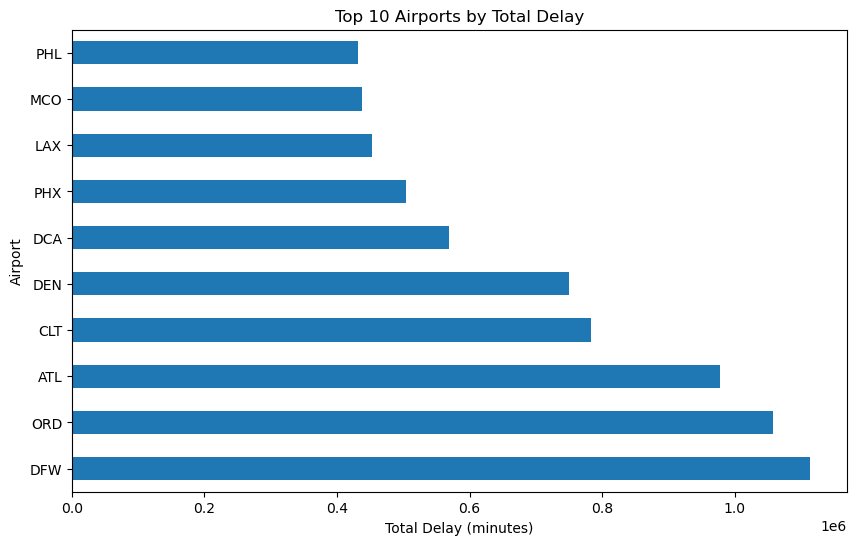

In [43]:
import matplotlib.pyplot as plt  # ✅ Run this once!

# Then your plot code
total_delay_airport.head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Airports by Total Delay')
plt.xlabel('Total Delay (minutes)')
plt.ylabel('Airport')
plt.show()


This bar chart shows the top 10 airports with the highest total delays.


### ⏱️ Total Delay by Cause

Finally, we analyze the main delay causes — carrier, weather, NAS (National Aviation System), security, and late aircraft — 
to see which ones contribute most to overall delays.


In [48]:
# Sum each major delay cause across all flights
delay_causes = df[['carrier_delay', 'weather_delay', 'late_aircraft_delay', 'security_delay']].sum()

# Put it in descending order
delay_causes = delay_causes.sort_values(ascending=False)

print(delay_causes)


late_aircraft_delay    9755644.0
carrier_delay          8547900.0
weather_delay          1863814.0
security_delay           30813.0
dtype: float64


### 📊 Visualize: Total Delay by Cause

We plot a simple bar chart to show which delay causes contribute the most.


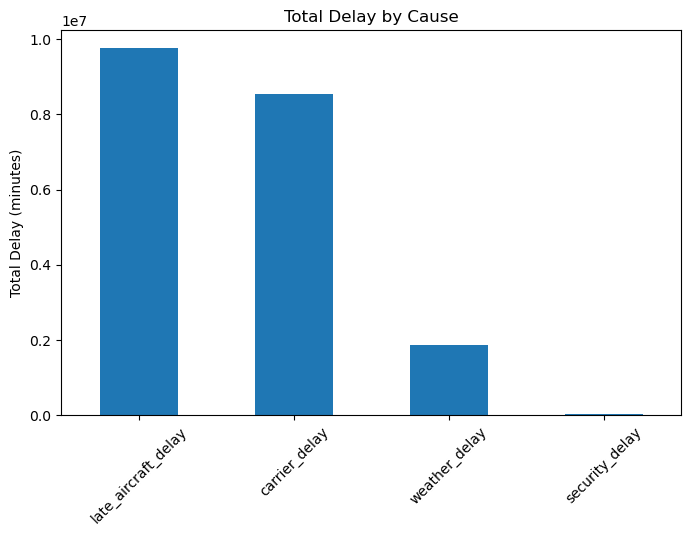

In [51]:
delay_causes.plot(kind='bar', figsize=(8, 5))
plt.title('Total Delay by Cause')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


## ✨ Insights & Recommendations

- The top airlines with the highest **average delays** are *American Airlines Network*, *Southwest Airlines*, and *Delta Air Lines Network*. These carriers may need to review their scheduling, maintenance, or turnaround processes to reduce delays.

- The busiest airports with the **highest total delay minutes** are *DFW*, *ORD*, and *ATL*. These airports could benefit from improved air traffic coordination and better resource allocation during peak hours.

- **Late aircraft** and **carrier delays** are the largest contributors to total delay time overall — much higher than weather or security delays. This suggests that better operational planning and tighter connections between flights could reduce late aircraft delays.

- To improve on-time performance, airlines should:
  - Optimize turnaround times and gate management.
  - Improve communication with ground operations and connecting flights.
  - Monitor and proactively manage flights with frequent late aircraft delays.

These insights help airlines and airport managers focus their efforts where they will have the biggest impact.


In [57]:
# Export cleaned dataset for Tableau
df.to_csv('data/Airline_Delay_Cause_CLEAN.csv', index=False)
